In [158]:
# install matplotlib_venn
import sys
!{sys.executable} -m pip install matplotlib_venn

In [159]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hirar_utils
from sklearn.cluster import AgglomerativeClustering
from matplotlib_venn import venn3, venn3_circles
from matplotlib_venn import venn2, venn2_circles


sb.set_theme()

# import data frames
%store -r final_data
# simplified dataframe with Principal components
%store -r data6D

# Hierarchical model
We will compare four different linkage methods on euclidean distance

In [160]:
data6DCP = data6D.copy()
countries = data6DCP["Country"]
data6DCP = data6DCP.drop(columns=["Country"])
plt.figure(figsize=(16,16))

# different types of linkages:
# ward - minizes variance
# average - uses the average of the distances of each observation of the two sets
# complete - uses the maximum distances between all observations of the two sets
# single - uses the minimum of the distances between all observations of the two sets

WARD = 'ward'
AVG = 'average'
COMPLETE = 'complete'
SINGLE = 'single'
DISTANCE = 'euclidean'

<Figure size 1152x1152 with 0 Axes>

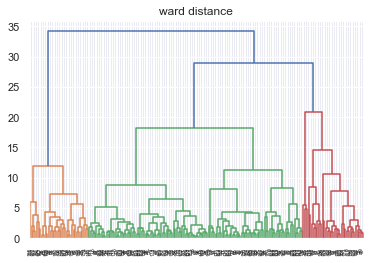

In [161]:
# ward
plt.plot(figsize=(16,24))
plt.title(WARD + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=WARD, metric=DISTANCE))

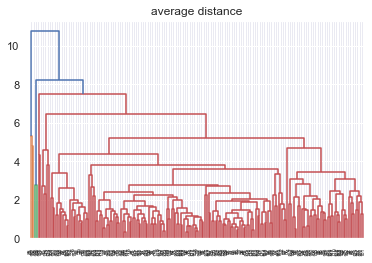

In [162]:
# average
plt.plot(figsize=(16,24))
plt.title(AVG + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=AVG, metric=DISTANCE))

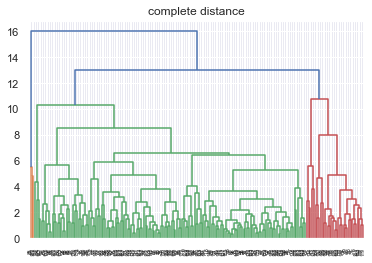

In [163]:
# complete
plt.plot(figsize=(16,24))
plt.title(COMPLETE + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=COMPLETE, metric=DISTANCE))

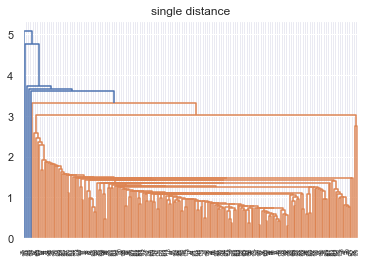

In [164]:
# single
plt.plot(figsize=(50,50))
plt.title(SINGLE + " distance")
dend = hirar_utils.dendrogram(hirar_utils.linkage(data6DCP, method=SINGLE, metric=DISTANCE))

### Choosing a linkage
From the dendograms,  
1. ward and complete give us the most clear cluster information  
2. 3 clusters appears to be optimal for both linkages based on color code

<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='count'>

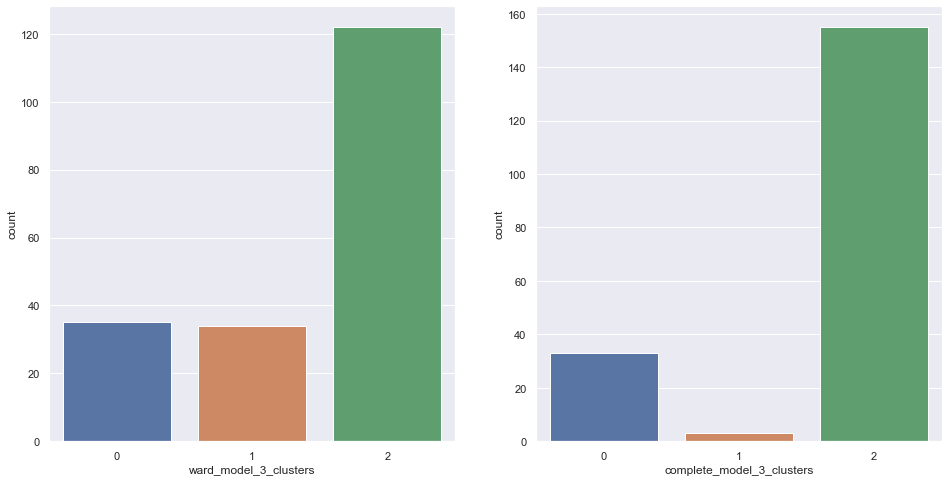

In [165]:
# do clustering
ward_model_3_clusters = AgglomerativeClustering(n_clusters=3, affinity=DISTANCE, linkage=WARD).fit_predict(data6DCP)
complete_model_3_clusters = AgglomerativeClustering(n_clusters=3, affinity=DISTANCE, linkage=COMPLETE).fit_predict(data6DCP)

# add cluster labels back to data
clustered_data = data6DCP.copy()
clustered_data["ward_model_3_clusters"] = pd.Categorical(ward_model_3_clusters)
clustered_data["complete_model_3_clusters"] = pd.Categorical(complete_model_3_clusters)


f, axes = plt.subplots(1,2, figsize=(16,8))
sb.countplot(x = "ward_model_3_clusters", data = clustered_data, ax=axes[0])
sb.countplot(x = "complete_model_3_clusters", data = clustered_data, ax=axes[1])

In [166]:
# add back country names
clustered_data["country"] = countries

# explore small cluster in complete model
print("Smallest cluster in complete model: ")
complete_smallest = clustered_data["complete_model_3_clusters"].value_counts().index[-1]
print(clustered_data[clustered_data["complete_model_3_clusters"] == complete_smallest]["country"])

Smallest cluster in complete model: 
35                        China
63                      Germany
182    United States of America
Name: country, dtype: object


<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='gdp-health-demographics-inv'>

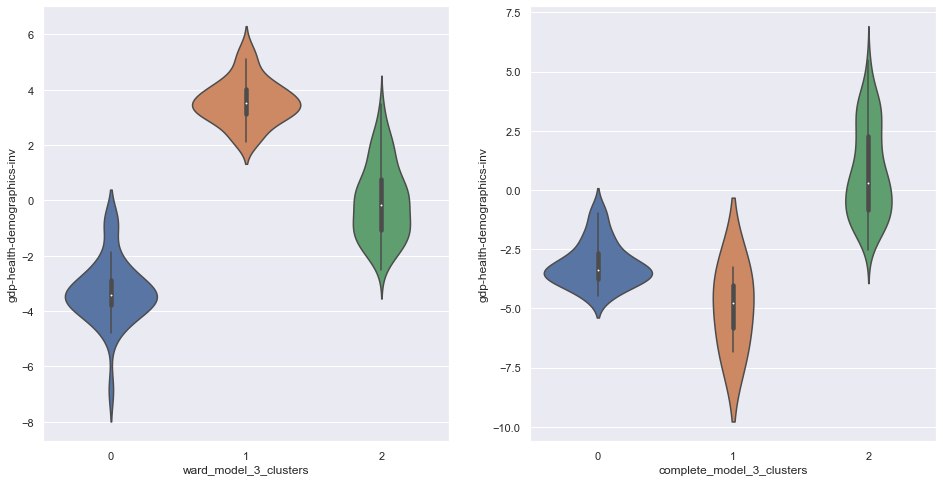

In [167]:
# feature: gdp-health-demographics-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'gdp-health-demographics-inv', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'gdp-health-demographics-inv', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])



<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='trade-inv'>

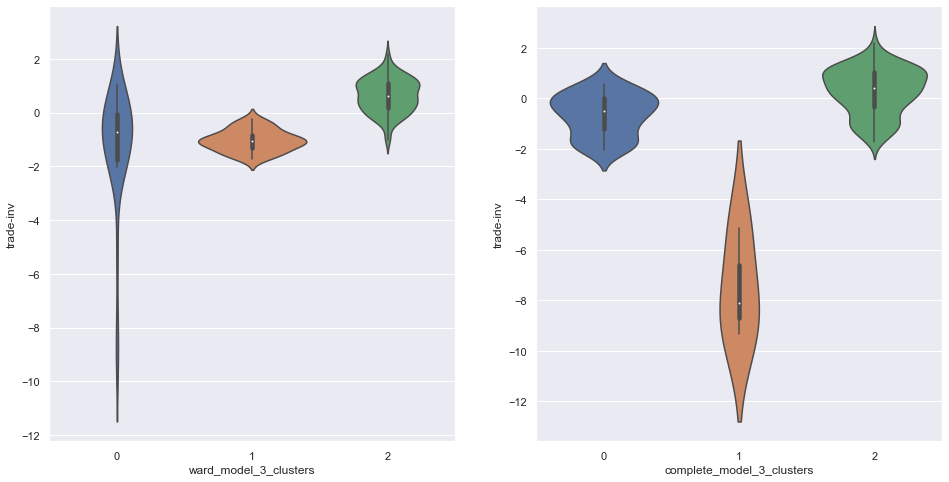

In [168]:
# feature: trade-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'trade-inv', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'trade-inv', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])

<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='trade-inv'>

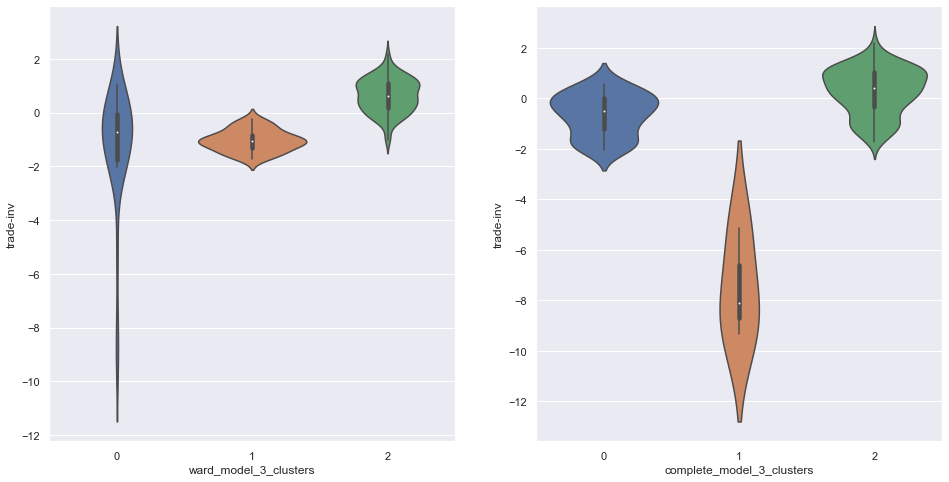

In [169]:
# feature: trade-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'trade-inv', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'trade-inv', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])

<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='agri-pop'>

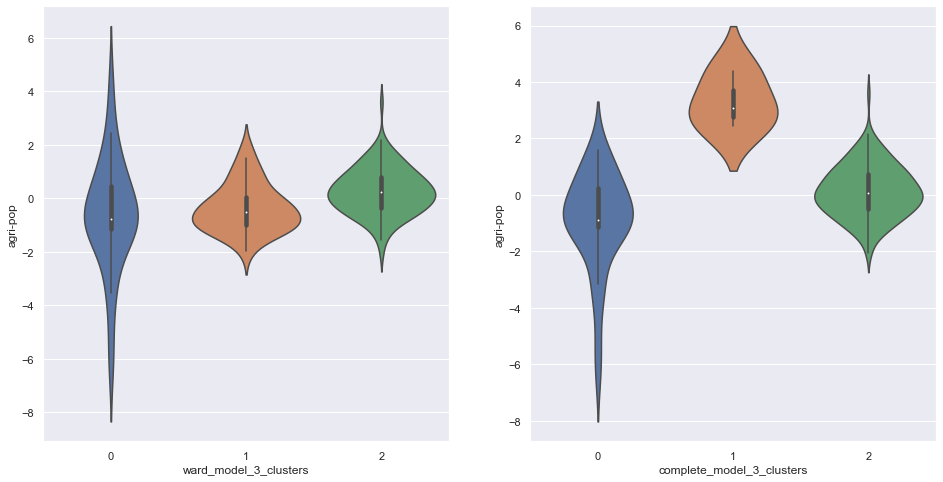

In [170]:
# feature: agri-pop  weak-gdp-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'agri-pop', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'agri-pop', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])

<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='weak-gdp-inv'>

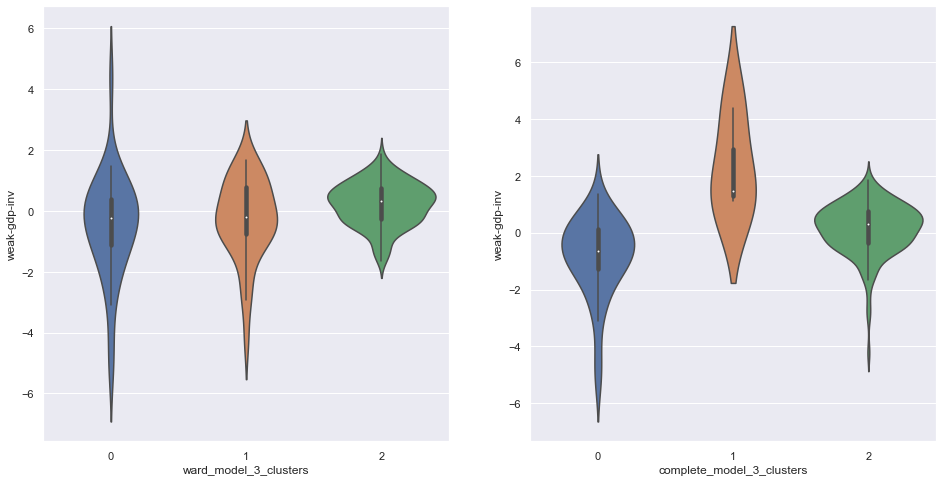

In [171]:
# feature: weak-gdp-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'weak-gdp-inv', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'weak-gdp-inv', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])

<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='education-inv'>

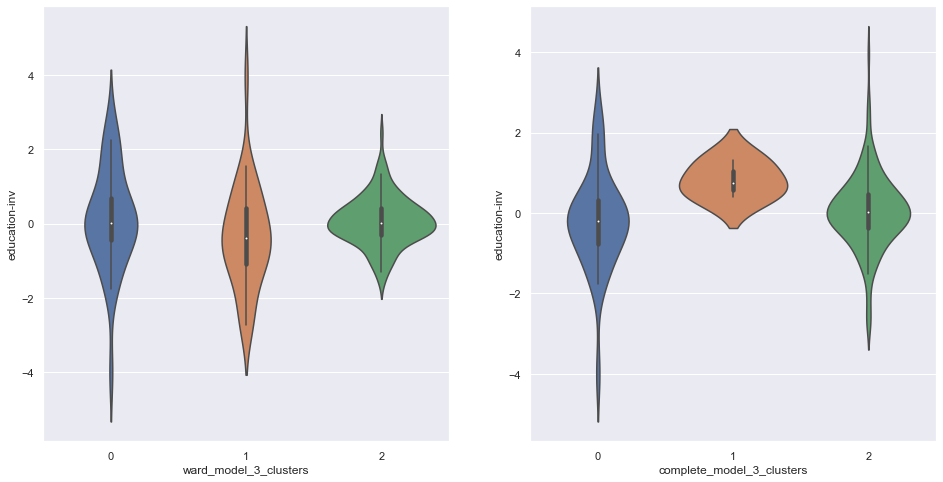

In [172]:
# feature: education-inv labour-participation-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'education-inv', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'education-inv', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])

<AxesSubplot:xlabel='complete_model_3_clusters', ylabel='labour-participation-inv'>

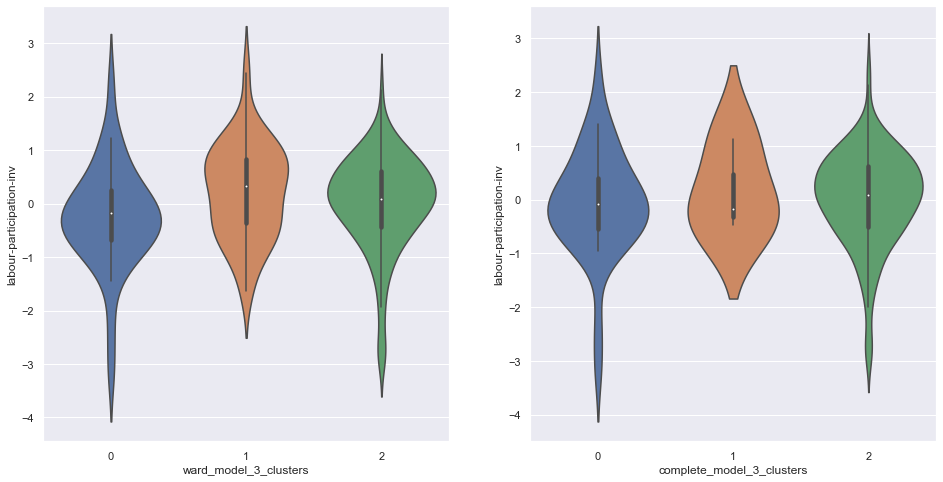

In [173]:
# feature: labour-participation-inv
f, axes = plt.subplots(1,2, figsize=(16,8))
sb.violinplot(y = 'labour-participation-inv', x = 'ward_model_3_clusters', data = clustered_data, ax = axes[0])
sb.violinplot(y = 'labour-participation-inv', x = 'complete_model_3_clusters', data = clustered_data, ax = axes[1])